In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset from CSV
df = pd.read_csv('MagicBricks.csv')

In [3]:
# Exploratory Data Analysis (EDA)
# Let's take a quick look at the first few rows of the dataset
print(df.head())

    Area  BHK  Bathroom      Furnishing  \
0  800.0    3       2.0  Semi-Furnished   
1  750.0    2       2.0  Semi-Furnished   
2  950.0    2       2.0       Furnished   
3  600.0    2       2.0  Semi-Furnished   
4  650.0    2       2.0  Semi-Furnished   

                                            Locality  Parking     Price  \
0                                   Rohini Sector 25      1.0   6500000   
1             J R Designers Floors, Rohini Sector 24      1.0   5000000   
2                Citizen Apartment, Rohini Sector 13      1.0  15500000   
3                                   Rohini Sector 24      1.0   4200000   
4  Rohini Sector 24 carpet area 650 sqft status R...      1.0   6200000   

          Status   Transaction           Type  Per_Sqft  
0  Ready_to_move  New_Property  Builder_Floor       NaN  
1  Ready_to_move  New_Property      Apartment    6667.0  
2  Ready_to_move        Resale      Apartment    6667.0  
3  Ready_to_move        Resale  Builder_Floor    6667.0  


In [4]:
# Summary statistics of the dataset
print(df.describe())

               Area          BHK     Bathroom      Parking         Price  \
count   1259.000000  1259.000000  1257.000000  1226.000000  1.259000e+03   
mean    1466.452724     2.796664     2.556086     1.935563  2.130670e+07   
std     1568.055040     0.954425     1.042220     6.279212  2.560115e+07   
min       28.000000     1.000000     1.000000     1.000000  1.000000e+06   
25%      800.000000     2.000000     2.000000     1.000000  5.700000e+06   
50%     1200.000000     3.000000     2.000000     1.000000  1.420000e+07   
75%     1700.000000     3.000000     3.000000     2.000000  2.550000e+07   
max    24300.000000    10.000000     7.000000   114.000000  2.400000e+08   

            Per_Sqft  
count    1018.000000  
mean    15690.136542  
std     21134.738568  
min      1259.000000  
25%      6364.000000  
50%     11291.500000  
75%     18000.000000  
max    183333.000000  


In [5]:
# Check for missing values
print(df.isnull().sum())

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64


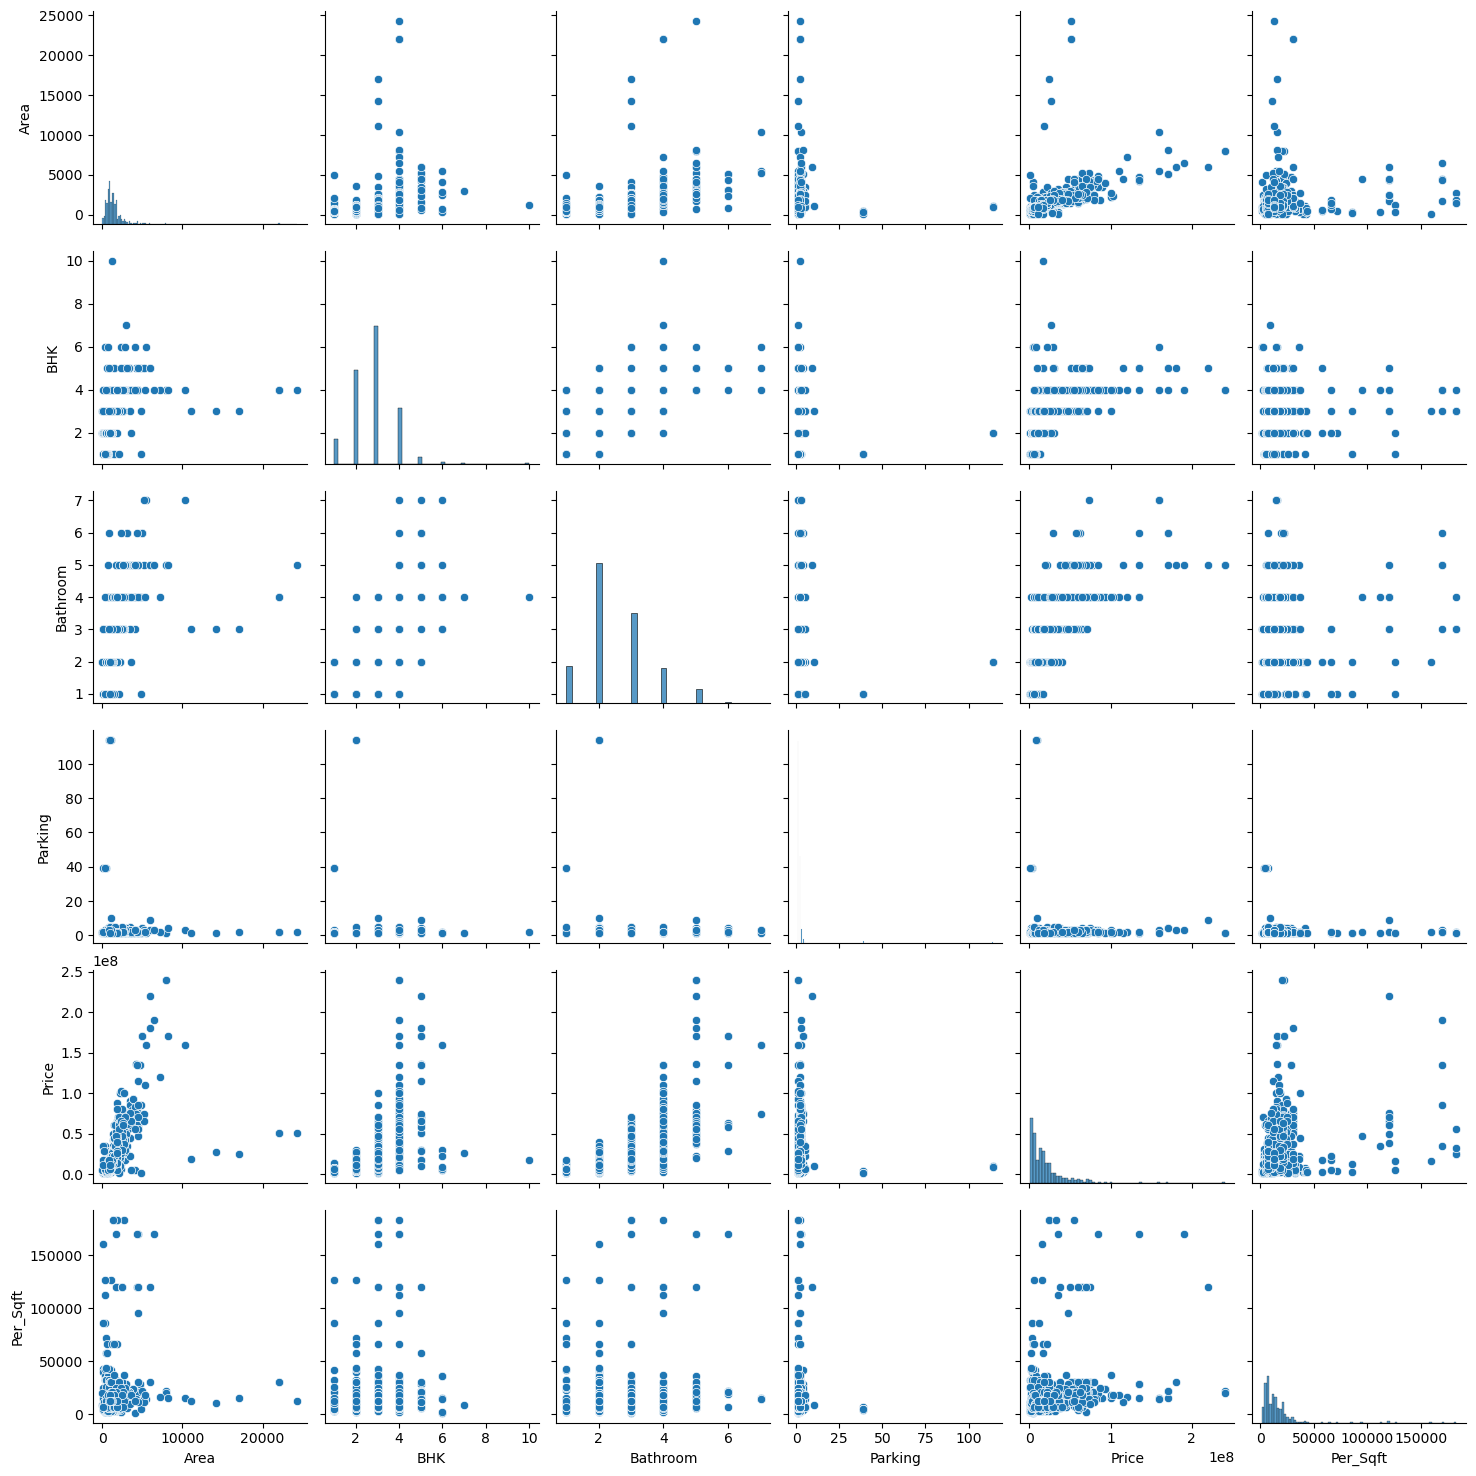

In [6]:
sns.pairplot(df)

C:\Users\rohit\AppData\Local\Temp\ipykernel_18820\4087192639.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


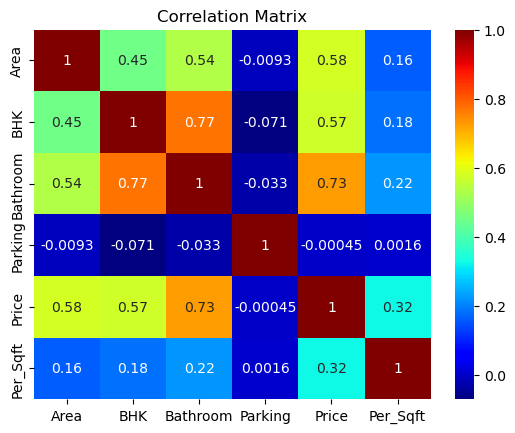

In [7]:
# Correlation matrix to understand feature relationships
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='jet')
plt.title("Correlation Matrix")
plt.show()

In [8]:
# Preprocessing: Selecting features and target variable
X = df[['Area','BHK','Bathroom','Parking']]
y = df['Price']

In [9]:
#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Building the Linear Regression Model
model = LinearRegression()

In [11]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())
print(X_test.isnull().sum())

Area         0
BHK          0
Bathroom     2
Parking     30
dtype: int64
0
Area        0
BHK         0
Bathroom    0
Parking     3
dtype: int64


In [12]:
X_train = X_train.dropna()
y_train = y_train.dropna()
X_test = X_test.dropna()

In [13]:
print(X_train.describe())
print(y_train.describe())
print(X_test.describe())

               Area         BHK    Bathroom     Parking
count    977.000000  977.000000  977.000000  977.000000
mean    1462.774653    2.785056    2.543501    1.903787
std     1664.673546    0.954316    1.027492    5.918240
min       28.000000    1.000000    1.000000    1.000000
25%      807.292500    2.000000    2.000000    1.000000
50%     1200.000000    3.000000    2.000000    1.000000
75%     1620.000000    3.000000    3.000000    2.000000
max    24300.000000   10.000000    7.000000  114.000000
count    1.007000e+03
mean     2.081051e+07
std      2.507852e+07
min      1.000000e+06
25%      5.500000e+06
50%      1.400000e+07
75%      2.500000e+07
max      2.400000e+08
Name: Price, dtype: float64
               Area         BHK    Bathroom     Parking
count    249.000000  249.000000  249.000000  249.000000
mean    1515.976483    2.863454    2.662651    2.060241
std     1217.485052    0.923173    1.080738    7.542914
min       50.000000    1.000000    1.000000    1.000000
25%      810

In [14]:
y_train = y_train.iloc[:977]  # Keep the first 977 samples of y_train

In [15]:
X_train = X_train.iloc[:1007]  # Keep the first 1007 samples of X_train

In [16]:
# Fitting the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Model Evaluation
y_pred = model.predict(X_test)

In [18]:
y_test = y_train.iloc[:249]
X_test = X_test.iloc[:252]

In [19]:
# Mean Squared Error and R-squared for model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [20]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 684997227140280.4
R-squared: -0.0079641699930042


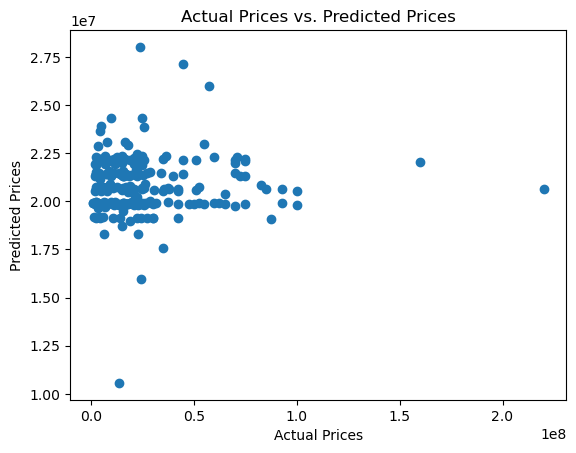

In [21]:
# Predictions and Visualization
# To visualize the predictions against actual prices, we'll use a scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

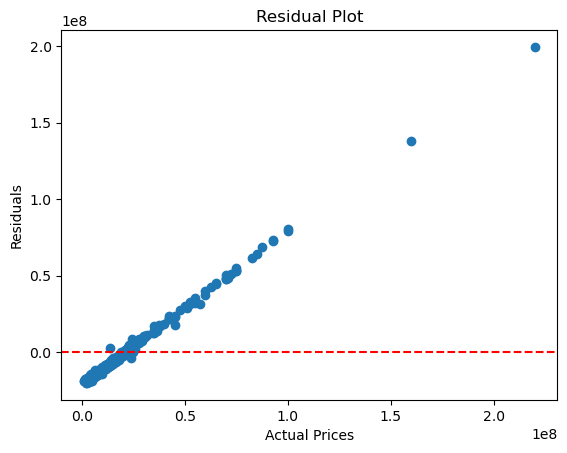

In [23]:
# We can also create a residual plot to check the model's performance
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [ ]:
# Lastly, let's use the trained model to make predictions on new data and visualize the results
new_data = [[5500, 5, 3, 2]]
predicted_price = model.predict(new_data)
print("Predicted Price:", predicted_price[0])